<a href="https://colab.research.google.com/github/maxkrakauer/DeepMovieGenrePrediction/blob/main/Copy_of_encoder_movie_genre_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import csv

data = pd.read_csv('/content/FinalProject/movie_plots_by_poster_revised.csv')
truncat = data[:34000]
truncat.values[0][4]

7.4

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import torch

model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [ ]:
x = truncat.drop(['id','poster','title','year','rating','genre','action','adventure','animation','comedy','crime','drama','fantasy','horror','mystery','romance','sci-fi','short','thriller'], axis = 1)
x = x.to_numpy()

In [ ]:
y = truncat.drop(['id','poster','title','year','rating','genre','plot'], axis = 1)
y = y.to_numpy()

In [ ]:
x_train, x_test = x[:25000,:], x[25000:,:]
y_train, y_test = y[:25000,:], y[25000:,:]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max')
model = tf.keras.Sequential()
model.add(hub_layer)

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(13,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 16)                8208      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]

y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    callbacks = [callback])

Epoch 1/15
49/49 [==============================] - ETA: 0s - loss: 0.4460 - accuracy: 0.8268

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


49/49 [==============================] - 133s 3s/step - loss: 0.4460 - accuracy: 0.8268 - val_loss: 0.4227 - val_accuracy: 0.8414


In [ ]:
results = model.evaluate(x_test, y_test)

print(results)

282/282 [==============================] - 6s 21ms/step - loss: 0.4562 - accuracy: 0.8142
[0.4562370479106903, 0.8142392039299011]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

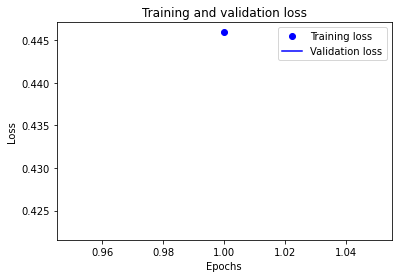

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

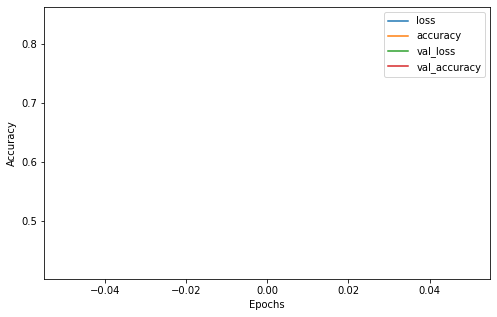

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()